In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/diabetes(1).csv")


In [ ]:
x=data.iloc[:,:8].values
y=data.iloc[:,8].values

In [ ]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
#Standard Scalar
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [ ]:
#Train model
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(x_train,y_train)


GaussianNB()

In [ ]:
#Predict classification on test set
y_pred=nbc.predict(x_test)

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
prediction=accuracy_score(y_test,y_pred)
print("Acuracy",prediction*100,"%")

Acuracy 76.5625 %


In [ ]:
#NBC along with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_
explained_variance

#Train model on PCA reduced data
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(x_train,y_train)
y_pred=nbc.predict(x_test)



In [ ]:
#Find Accuracy
from sklearn.metrics import accuracy_score
prediction=accuracy_score(y_test,y_pred)
print("Accuracy is:",prediction*100,"%")

Accuracy is: 73.4375 %


<ipython-input-17-6c4497b15ccd>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


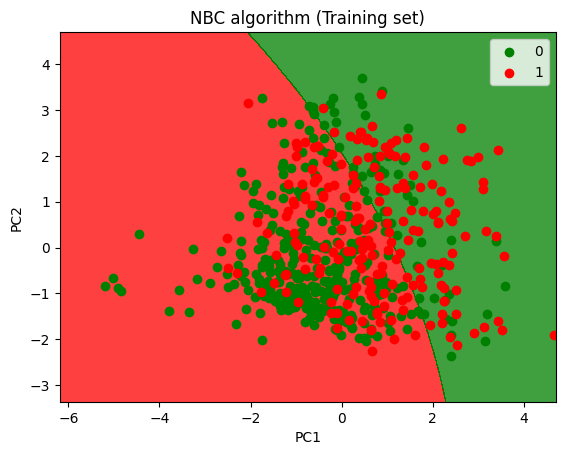

In [ ]:
from matplotlib.colors import ListedColormap
X_set,Y_set=x_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,1].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,nbc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(("red","green")))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],
              c = ListedColormap(('green','red'))(i),label =j)
plt.title('NBC algorithm (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


<ipython-input-18-390c0ec8c799>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],


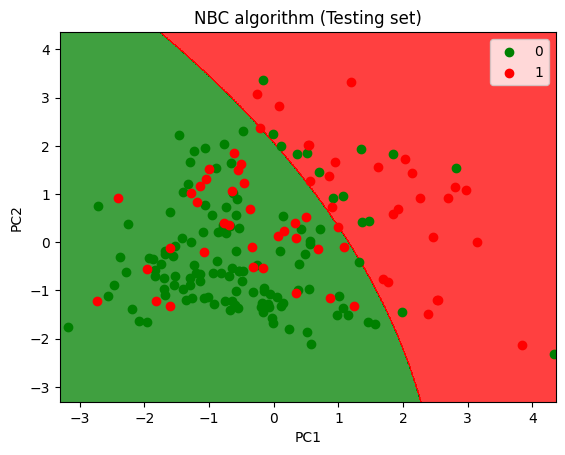

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set , Y_set = x_test ,y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1 , step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1 , step = 0.01))
plt.contourf(X1 , X2, nbc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap =ListedColormap(('green','red')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())

for i, j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0],X_set[Y_set ==j,1],
              c = ListedColormap(('green','red'))(i),label =j)
plt.title('NBC algorithm (Testing set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()